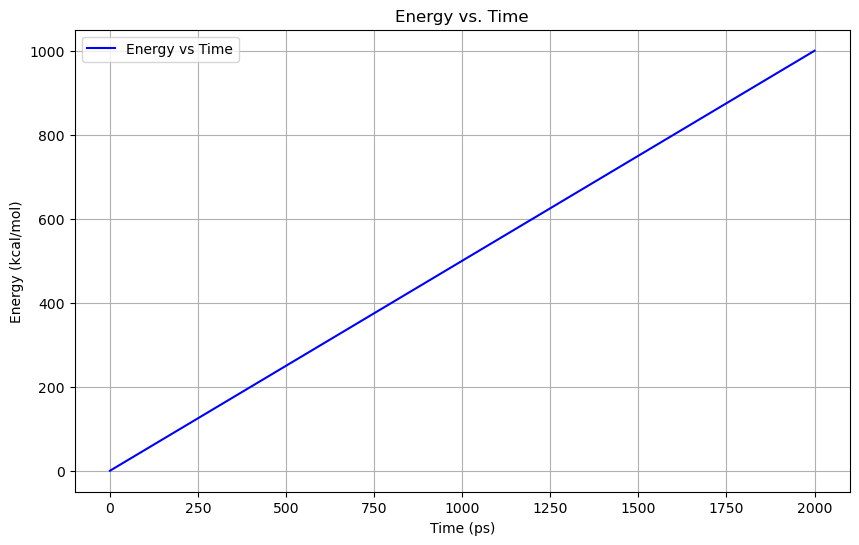

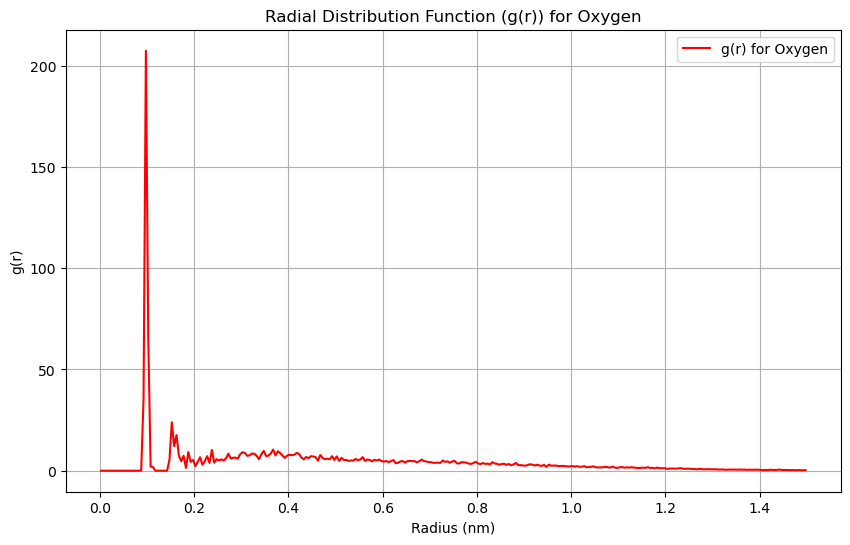

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
from mdtraj.core.topology import Topology

# 1. Analyze Energy vs. Time
# Read the .ener file and determine the correct number of columns
ener_file = 'proton_aimd_1ns_every0.5fs-1.ener'
data = np.loadtxt(ener_file)

if data.shape[1] >= 2:
    time, energy = data[:, 0], data[:, 1]
else:
    raise ValueError("Expected at least two columns in the .ener file: time and energy.")

plt.figure(figsize=(10, 6))
plt.plot(time, energy, label='Energy vs Time', color='blue')
plt.xlabel('Time (ps)')
plt.ylabel('Energy (kcal/mol)')
plt.title('Energy vs. Time')
plt.legend()
plt.grid()
plt.savefig('energy_vs_time.png')
plt.show()

# 2. Compute g(r) for oxygens using MDTraj
# Load trajectory and manually construct a topology
traj_file = 'proton.xyz'

# Read the XYZ file to get the correct atom count
with open(traj_file, 'r') as f:
    lines = f.readlines()
    num_atoms = int(lines[0].strip())  # First line in XYZ file specifies the number of atoms

# Define a simple topology (assume all atoms are oxygen for this example)
topology = Topology()
chain = topology.add_chain()
residue = topology.add_residue('SOL', chain)
for i in range(num_atoms):  # Adjust based on the number of atoms in the XYZ file
    topology.add_atom('O', element=md.element.oxygen, residue=residue)

# Load the XYZ file with the constructed topology
trajectory = md.load_xyz(traj_file, top=topology)

# Assign a constant box size manually
box_size = np.array([3.0, 3.0, 3.0])  # Example box size, update as per your input
trajectory.unitcell_lengths = np.array([box_size])
trajectory.unitcell_angles = np.array([[90.0, 90.0, 90.0]])

# Select oxygen atoms
oxygen_indices = trajectory.topology.select('name O')

# Compute g(r)
pairs = [(i, j) for i in oxygen_indices for j in oxygen_indices if i < j]
radii, gr = md.compute_rdf(trajectory, pairs=pairs, r_range=(0.0, 1.5))

plt.figure(figsize=(10, 6))
plt.plot(radii, gr, label='g(r) for Oxygen', color='red')
plt.xlabel('Radius (nm)')
plt.ylabel('g(r)')
plt.title('Radial Distribution Function (g(r)) for Oxygen')
plt.legend()
plt.grid()
plt.savefig('gr_oxygen.png')
plt.show()
